# Regression Session

Last week, we looked at correlation to assess whether two variables related to each other. Unfortunately, this did not tell us anything about the direction of causality: A correlation between variable X and Y could mean that X predicts Y, but it could also mean that Y predicts X, or even that a third variable predicts both X and Y.

This week's statistical tool allows you to be a bit more explicit about your predictions. In a **regression**, you use one or more variables to predict one or more other variables. This doesn't automatically mean that regressions tell you about the direction of causality, but at least you can use it to get a bit closer.

## The basics

We'll start of simple, with a regression in which one variable X predicts another variable Y. This is roughly equivalent to a correlation. In order to make this a bit more exciting, let's look at some real data!

#### Background to our data

At the Winter Olympics, there is a sport called *speed skating*. If you're not from a select few countries, you might not have heard of it. It's essentially like running, but then you do it on ice, using special skates. In most disciplines, only two skaters compete against each other at a time. The times are compared between all athletes afterwards, and whoever had the best time wins. One of the more exciting races, is the 500 meter sprint. All competing athletes are *highly* trained, and focus on raw power and technique, as that is all that matters. Right?

Well, perhaps not. Perhaps coincidence or even bias might also play a role. You see, the starting procedure in speed skating is like most other racing sports. The referee says "Ready?", then waits for a bit, and then shoots their starting pistol. The regulations are clear on that "bit" of time: It should be 1-1.5 seconds from the moment athletes are in position, and hence it's regulated to be random.

Unlike in other racing sports, speed skaters race alone or against a single opponent, and times are compared afterwards. (So the main competitors for the win might not directly face each other!) This means that every pair of racers starts with a different interval between their "Ready" cue and the starting shot.

Does this matter? In theory, the "Ready" signal could be considered an *alerting cue*, and we know from psychological research that the time between an alerting cue and a subsequent signal affects how quickly people respond to said signal. In practice, an interval of 500 ms results in an optimal response time, and longer intervals result in higher response times.

Now, obviously, the Winter Olympics are not some psychological experiment. These aren't a bunch of students in some dank lab room, these are highly trained athletes competing under immense pressure, looked on by thousands of spectators in the stadium, and even more watching from home through live stream or television. Surely this alerting thing will not affect their actual performance?

That sounds like an empirical question!

#### Loading our data

The National Skating Union records not only finish times at 500 meters, but also measures athletes' time 100 meters into the race. Both of these numbers are freely available. Researchers from the Universities of Oxford (UK) and Utrecht (Netherlands) have collected data on the intervals between the onset of the "Ready" signal and the onset of the starting shot. The attached file, `speed_skating_all_races.csv`, has both the 100 and 500 meter times, and the ready-start intervals. In addition, there is a column that indicates whether an athlete fell or stumbled during a race.

You can load those data into Python using NumPy's `loadtxt` function:

In [129]:
import numpy
from matplotlib import pyplot

# Load the data from all individual races.
data = numpy.loadtxt("speed_skating_all_races.csv", \
    delimiter=",", dtype=float, skiprows=1, unpack=True)

Let's do some convenience renaming on the columns in the data file:

In [130]:
# Get the ready-start interval data.
interval = data[0,:]
# Get the times at 100 and 500 meters.
time_100m = data[1,:]
time_500m = data[2,:]
# Get the sex data, which is formatted as a 1 for male and
# 0 for female. We can cast this into Booleans: True (1) 
# or False (0) for the question "Is this athlete male?"
is_male = data[3,:].astype(bool)
# The data on falls is formatted in the same way: 1 for a 
# fall/stumble, and 0 for a regular race. We can cast this
# into Booleans too: True (1) of False (0) for "Did this
# athlete fall?"
fall = data[4,:].astype(bool)

#### Getting a feel for the data

Let's plot the data! Make sure to plot the (near) falls in a different colour, so we can see whether they really are different from the normal races.

Text(0,0.5,u'Finish time (sec)')

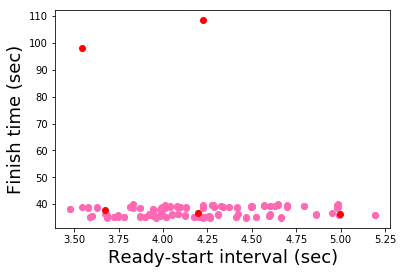

In [131]:
# Plot the ready-start interval on the x-axis, and the 500
# meter times on the y-axis.
pyplot.plot(interval[fall==False], time_500m[fall==False], \
    'o', color="#FF69B4")
# Also plot the races in which athletes fell or stumbled.
pyplot.plot(interval[fall==True], time_500m[fall==True], \
    'o', color="#FF0000")

# Add axis labels to make the plot clearer.
pyplot.xlabel("Ready-start interval (sec)", fontsize=18)
pyplot.ylabel("Finish time (sec)", fontsize=18)

So the first thing you see is that there are two REALLY slow races, both due to falls. Let's set a limit on the y-axis that will allow us to actually see the data.

(34, 41)

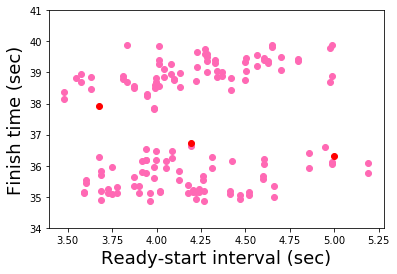

In [132]:
# Plot the ready-start interval on the x-axis, and the
# 500 meter times on the y-axis.
pyplot.plot(interval[fall==False], time_500m[fall==False], \
    'o', color="#FF69B4")
# Also plot the races in which athletes fell or stumbled.
pyplot.plot(interval[fall==True], time_500m[fall==True], \
    'o', color="#FF0000")

# Add axis labels to make the plot clearer.
pyplot.xlabel("Ready-start interval (sec)", fontsize=18)
pyplot.ylabel("Finish time (sec)", fontsize=18)

# Set the axis limit.
pyplot.ylim([34, 41])

It's quite clear there are two separate sub-groups in the data here... Let's see whether that corresponds with sex:

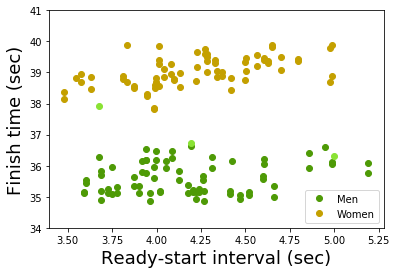

In [133]:
# MALE
# Plot the ready-start interval on the x-axis, and the 500
# meter times on the y-axis.
pyplot.plot(interval[(is_male == True) & (fall==False)], \
    time_500m[(is_male == True) & (fall==False)], 'o', \
    color="#4e9a06", label="Men")
# Also plot the races in which athletes fell or stumbled.
pyplot.plot(interval[(is_male == True) & (fall==True)], \
    time_500m[(is_male == True) & (fall==True)], 'o', \
    color="#8ae234")

# FEMALE
# Plot the ready-start interval on the x-axis, and the 500 
# meter times on the y-axis.
pyplot.plot(interval[(is_male == False) & (fall==False)], \
    time_500m[(is_male == False) & (fall==False)], 'o', \
    color="#c4a000", label="Women")
# Also plot the races in which athletes fell or stumbled.
pyplot.plot(interval[(is_male == False) & (fall==True)], \
    time_500m[(is_male == False) & (fall==True)], 'o', \
    color="#fce94f")

# Add axis labels to make the plot clearer.
pyplot.xlabel("Ready-start interval (sec)", fontsize=18)
pyplot.ylabel("Finish time (sec)", fontsize=18)

# Set the axis limit.
pyplot.ylim([34, 41])

# Add a legend.
pyplot.legend(loc="lower right")

It seems that on average, men were about 4 seconds quicker than women. That means we can't just compute a Pearson correlation on the entire dataset as one group: Clearly there are two separate underlying distributions. However, we don't really care about the difference between men and women here. Instead, we're only interested in whether or not there is an effect of ready-start interval on finish times.

In order to look at this, we could z-score the data within each group. This subtracts the group mean from every sample, and then divides it by the group standard deviation. The z-scored finish times for men and women should both have a mean of 0 and a standard deviation of 1, making the two groups directly comparable. (And, more importantly, combinable!)

In [134]:
from scipy.stats import zscore

# Compute the z-scored finish times.
z_time_500m_male = \
    zscore(time_500m[(is_male==True) & (fall==False)])
z_time_500m_female = \
    zscore(time_500m[(is_male==False) & (fall==False)])

# Combine the two vectors into one.
z_time_500m = \
    numpy.hstack([z_time_500m_male, z_time_500m_female])

In [135]:
# Import the Pearson correlation function.
from scipy.stats import pearsonr

# Compute the correlation between interval and finish time.
r, p = pearsonr(interval[fall==False], z_time_500m)

print("R=%.2f, p=%.3f" % (r, p))

R=0.34, p=0.000


OK, so we now know that there is a *statistically* significant correlation between ready-start interval and finish time. However, we don't know whether this correlation is *practically* significant. Ideally, we would like to know exactly how a longer ready-start interval affects the finish time. In other words: If the referee waits 1 second longer to shoot the starting pistol, how much slower does an athlete become?

To answer this question, we can use *regression*.

#### Linear regression

One thing that wasn't mentioned about the 500 meter sprint in speed skating, is that athletes race twice. After the first round of races, pairs are mixed up, and all athletes race again. Their times of both races are combined, and whoever has the lowest summed time wins a gold medal.

This is not unlike an experimental manipulation: It sounds a bit like a researcher used two trials per participant to estimate the effect of ready-start interval on finish time. This is exactly how you can use the data!

For our each athlete, you can compute the difference in ready-start interval between both races. This will be your *predictor* variable `x`.

You can also compute the difference in finish times between both races. This will be your *outcome* variable `y`.

In a regression, you try to predict the outcome with one or more predictors. Or, in an equation:

$y = \beta_{0} + x_{1} \beta_{1} + \epsilon$

Where $y$ is the outcome variable, $\beta_{0}$ is the intercept (what is $y$ when all $x$ values are zero?),  $x_{1}$ is the first predictor variable, $\beta_{1}$ is a free variable that determines how much $x_{1}$ affects $y$, and $\epsilon$ is the *error term* that determines how much was unaccounted for. Sometimes this is called *noise*, because it refers to all unpredicted things.

Or, in code:

```python
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

First, we need to compute our predictor and outcome: The differences between the two races of each athlete in ready-start interval and finish time. We can load the data for individual races from the file `speed_skating_paired_races.csv`.

In [136]:
# Load the data from all individual races.
data = numpy.loadtxt("speed_skating_paired_races.csv", \
    delimiter=",", dtype=float, skiprows=1, \
    usecols=range(1,9), unpack=True)

# Rename the variables for our convenience.
interval_1 = data[0,:]
time_100m_1 = data[1,:]
time_500m_1 = data[2,:]
interval_2 = data[3,:]
time_100m_2 = data[4,:]
time_500m_2 = data[5,:]
is_male = data[6,:].astype(bool)
exclude = data[7,:].astype(bool)

Now we can compute the differences in ready-start interval and finish time between the two races. We'll exclude all the athletes who (nearly) fell, but we won't separate men and women again. This is because we have no reason to assume that alerting effects are any different between men and women, and thus our hypothesis should be that *all* athletes are affected, regardless of sex.

In [137]:
# Compute the interval difference between race 1 and 2.
interval_d = \
    interval_1[exclude==False] - interval_2[exclude==False]
# Compute the finish time difference between race 1 and 2.
time_500m_d = \
    time_500m_1[exclude==False] - time_500m_2[exclude==False]

Let's do a quick check to see what our data looks like:

Text(0,0.5,u'Finish time difference (sec)')

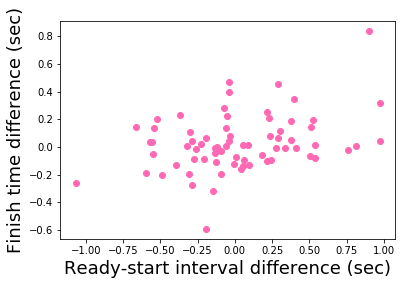

In [138]:
# Plot the values.
pyplot.plot(interval_d, time_500m_d, 'o', color="#FF69B4")
# Add axis labels.
pyplot.xlabel("Ready-start interval difference (sec)", fontsize=18)
pyplot.ylabel("Finish time difference (sec)", fontsize=18)

In the graph, we can see that ready-start interval differences lie between -1 and 1 seconds. We can also see that finish times are quite stable within each individual athlete: Most differences are between -0.4 and 0.4 seconds!

In addition, just by eyeballing the graph, it looks like there might be a positive correlation between the ready-start interval difference and the finish time difference. Let's quantify this relation by using a regression:

In [139]:
from scipy.stats import linregress

slope, intercept, r, p, std_err = \
    linregress(interval_d, time_500m_d)

print("R=%.2f, p=%.3f" % (r, p))
print("slope=%.2f, intercept=%.2f" % (slope, intercept))

R=0.35, p=0.003
slope=0.17, intercept=0.03


From the output, we can learn that there is a statistically significant correlation with a Pearson R of 0.35. In addition, we now know how to quantify the effect:

$y = 0.03 + 0.17 x_{1}$

or:

$\Delta_{finish} = 0.03 + 0.17 \Delta_{interval}$

In practice, this means that for every second the referee waits between "Ready" and the starting shot, they add (on average) 0.17 seconds to an atheletes finish time. You can draw this line into your graph:

Text(0,0.5,u'Finish time difference (sec)')

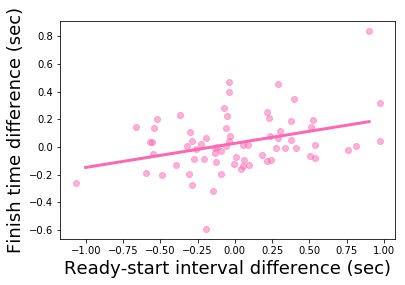

In [140]:
# Select a bunch of x values that will cover the range of
# the interval difference data.
x = numpy.arange(-1, 1, 0.1)
# Compute what the predicted y values would be for each
# of these values.
y = intercept + slope * x

# Plot the line into a graph.
pyplot.plot(x, y, '-', linewidth=3, color="#FF69B4")

# Plot the measured values.
pyplot.plot(interval_d, time_500m_d, 'o', color="#FF69B4", \
    alpha=0.5)

# Add axis labels.
pyplot.xlabel("Ready-start interval difference (sec)", \
    fontsize=18)
pyplot.ylabel("Finish time difference (sec)", fontsize=18)

Is this a problem? Well, at Vancouver in 2010, the total difference between gold and silver was 0.16 seconds. And it is not uncommen at all for speed skaters to get even closer: In 2014, the difference between gold and silver was 0.01 seconds, and between gold and bronze it was 0.15. In 2018, the difference between gold and silver was 0.01 seconds again.

Clearly, the margins are small, and thus this ready-start interval effect might have real-life consequences.

#### References

If you're interested in the background to the data, you can read the following two articles. They're very short, and not very technical:

- Dalmaijer, E.S., Nijenhuis, B.G., & Van der Stigchel, S. (2015). Life is unfair, and so are racing sports: Some athletes can randomly benefit from alerting effects due to inconsistent starting procedures. Frontiers in Psychology, 6(1618). doi:[10.3389/fpsyg.2015.01618](http://dx.doi.org/10.3389/fpsyg.2015.01618)
- Dalmaijer, E.S., Nijenhuis, B.G., & Van der Stigchel, S. (2016). Commentary: Life is unfair, and so are racing sports: Some athletes can randomly benefit from alerting effects due to inconsistent starting procedures. Frontiers in Psychology, 7(119). doi:[10.3389/fpsyg.2016.00119](http://dx.doi.org/10.3389/fpsyg.2016.00119)

## But how does regression work?

In regression, you have an explicit *model* for your data. Specifically, it says that there is a linear relationship between variables $y$ and $x$:

$y = \beta_{0} + x_{1} \beta_{1} + \epsilon$

You know what the values for $y$ are, because you measured those. You also know what the values for $x$ are, because you manipulated (or measured) those. But how do you know what the $\beta$ values are? And what that $\epsilon$ is?

One way would be to simply try all possible values of each $\beta$, and see when the resulting line fits best. How do you know what set of $\beta$ values fits best? Simple: It's when the difference between your predicted values of $y$ and your measured values of $y$ is the smallest.

Let's give this approach a go with the skating dataset:

In [141]:
# First, define the ranges along which we need to 
# search for the best fitting betas.
b0_range = numpy.arange(0, 1, 0.01)
b1_range = numpy.arange(-10, 10, 0.01)

# Count the number of values we will try for each beta.
n_b0 = len(b0_range)
n_b1 = len(b1_range)

# Second, define some starting values. The first are the
# betas, which will be None to start with.
beta = (None, None)
# We also need to start with a difference between the y 
# values and the predicted y values. This
# will start at infinitely high:
min_s = numpy.inf

# Finally, we loop through every possible combination of 
# b0 and b1.
for i, b0 in enumerate(b0_range):
    for j, b1 in enumerate(b1_range):
        # Predict y using the current betas.
        y_pred = b0 + b1 * interval_d
        # Compute the difference between the predicted y 
        # and the measured y for each observation.
        d = time_500m_d - y_pred
        # Compute the sum of squares of the differences 
        # (residuals).
        s = numpy.sum(d**2)
        # Remember the current betas if the sum of squares
        # is lower than the previously lowest.
        if s < min_s:
            betas = (b0, b1)
            min_s = s

print("Best fit: b0=%.2f, b1=%.2f" % (betas[0], betas[1]))

Best fit: b0=0.03, b1=0.17


As you might recall, these are the same values that you obtained through using the `linregress` function earlier!

The reason this works, is because you travelled through *parameter space*, and at each point computed the *sum of squares* of the difference between the actual and your predicted values. This difference is called the *residuals*. You kept track of which point in parameter space was associated with the lowest *squared residuals*. This is called *least-squares regression*.

You can actually plot parameter space and the associated residual squares:

Best fit: b0=0.03, b1=0.17


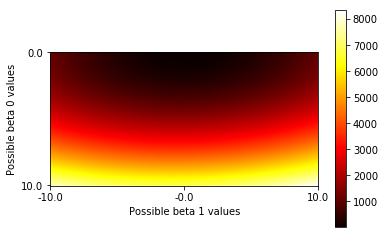

In [142]:
# First, define the ranges along which we need to search 
# for the best fitting betas.
b0_range = numpy.arange(0, 10, 0.01)
b1_range = numpy.arange(-10, 10, 0.01)

# Count the number of values we will try for each beta.
n_b0 = len(b0_range)
n_b1 = len(b1_range)

# Second, define some starting values. The first are the
# betas, which will be None to start with.
beta = (None, None)
# We also need to start with a difference between the y
# values and the predicted y values. This
# will start at infinitely high:
min_s = numpy.inf
# Keep track of the residuals at every point in parameter
# space. This starts as a matrix filled with NaN (not a
# number), and one value will be added on every iteration.
s = numpy.zeros((n_b0,n_b1), dtype=float) * numpy.NaN

# Finally, we loop through every possible combination of 
# b0 and b1.
for i, b0 in enumerate(b0_range):
    for j, b1 in enumerate(b1_range):
        # Predict y using the current betas.
        y_pred = b0 + b1 * interval_d
        # Compute the difference between the predicted y 
        # and the measured y for each observation.
        d = time_500m_d - y_pred
        # Compute the sum of squares of the differences
        # (residuals).
        s[i,j] = numpy.sum(d**2)
        # Remember the current betas if the sum of squares
        # is lower than the previously lowest.
        if s[i,j] < min_s:
            betas = (b0, b1)
            min_s = s[i,j]

print("Best fit: b0=%.2f, b1=%.2f" % (betas[0], betas[1]))

# Now plot the residual squares in parameter space:
pyplot.imshow(s, cmap="hot")
# Set the tick labels on the x and y axes.
x_ticks = [0, n_b1//2, n_b1-1]
x_tick_labels = numpy.round(b1_range[x_ticks])
pyplot.xticks(x_ticks, x_tick_labels)
pyplot.xlabel("Possible beta 1 values")
y_ticks = [0, n_b0-1]
y_tick_labels = numpy.round(b0_range[y_ticks])
pyplot.yticks(y_ticks, y_tick_labels)
pyplot.ylabel("Possible beta 0 values")

# Draw an colour bar to show the resulting sums of residual
# squares.
pyplot.colorbar()

From this plot, you can see that the optimal combination of betas is close to point (0,0). However, you can also see that we cast a *very* wide net. Perhaps it would have been better to choose a smaller search space. For example, instead of using ranges $[0,10]$ for $\beta_{0}$ and $[-10,10]$ for $\beta_{1}$, we could have used $[0,0.1]$ and $[0,0.5]$

Best fit: b0=0.03, b1=0.17


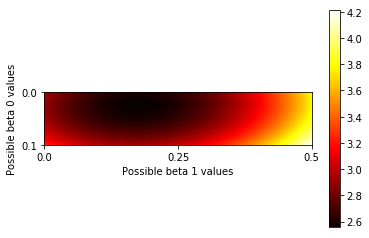

In [143]:
# First, define the ranges along which we need to 
# search for the best fitting betas.
b0_range = numpy.arange(0, 0.1, 0.001)
b1_range = numpy.arange(0, 0.5, 0.001)

# Count the number of values we will try for each beta.
n_b0 = len(b0_range)
n_b1 = len(b1_range)

# Second, define some starting values. The first are the
# betas, which will be None to start with.
beta = (None, None)
# We also need to start with a difference between the y
# values and the predicted y values. This
# will start at infinitely high:
min_s = numpy.inf
# Keep track of the residuals at every point in parameter
# space. This starts as a matrix filled with NaN (not a 
# number), and one value will be added on every iteration.
s = numpy.zeros((n_b0,n_b1), dtype=float) * numpy.NaN

# Finally, we loop through every possible combination of 
# b0 and b1.
for i, b0 in enumerate(b0_range):
    for j, b1 in enumerate(b1_range):
        # Predict y using the current betas.
        y_pred = b0 + b1 * interval_d
        # Compute the difference between the predicted y 
        # and the measured y for each observation.
        d = time_500m_d - y_pred
        # Compute the sum of squares of the differences 
        # (residuals).
        s[i,j] = numpy.sum(d**2)
        # Remember the current betas if the sum of squares
        # is lower than the previously lowest.
        if s[i,j] < min_s:
            betas = (b0, b1)
            min_s = s[i,j]

print("Best fit: b0=%.2f, b1=%.2f" % (betas[0], betas[1]))

# Now plot the residual squares in parameter space:
pyplot.imshow(s, cmap="hot")
# Set the tick labels on the x and y axes.
x_ticks = [0, n_b1//2, n_b1-1]
x_tick_labels = numpy.round(b1_range[x_ticks], 2)
pyplot.xticks(x_ticks, x_tick_labels)
pyplot.xlabel("Possible beta 1 values")
y_ticks = [0, n_b0-1]
y_tick_labels = numpy.round(b0_range[y_ticks], 2)
pyplot.yticks(y_ticks, y_tick_labels)
pyplot.ylabel("Possible beta 0 values")

# Draw an colour bar to show the resulting sums of residual
# squares.
pyplot.colorbar()

Here, it's a lot clearer that the best fitting combination is at (0.17, 0.03).

#### Doing your own least-squares regression

What you just did is a *full space estimate*. The advantage of such an approach is that you tried every possible combination within a pre-defined grid. A significant downside, however, is that it takes ages to complete. Especially if you have no clue where your possible $\beta$ values are going to be and if you want a high resolution estimate, you would have to try a very large number of combinations. And if you want to add additional predictors, your grid will grow exponentially.

Instead, there are *minimisation algorithms*. These will walk through parameter space in a clever way. Most work by randomly starting at one particular point and computing the residual squares, then they try a nearby point and compute the residual squares again. By using the slope between these points, the algorithm knows where to go: Because the best fitting solution is at the point with the lowest residual square, the algorithm simply has to follow the slope downwards until it reaches a point where it can no longer go down any further. This is the best fit!

Let's try one of these minimisation algorithms. It needs a function to minimise the value for (i.e. a function that computes the residual squares):

In [144]:
# Import the minimize function from SciPy.
from scipy.optimize import minimize

# Define a function to compute the sum of residual 
# squares based on our model.
def residuals(betas, x, y):
    # Compute the predicted value of y.
    y_pred = betas[0] + betas[1] * x
    # Compute the residuals.
    res = y - y_pred
    # Compute the sum of squared residuals.
    s = numpy.sum(res**2)
    # Return the squared residuals.
    return s

# Choose values that the algorithm uses as an initial guess.
initial_guess = (0.0, 0.0)
# Use the mimize function to compute the best fit.
model = minimize(residuals, initial_guess, \
    args=(interval_d, time_500m_d), method="L-BFGS-B")

# Report the betas.
betas = model.x
print("Best fit: b0=%.2f, b1=%.2f" % (betas[0], betas[1]))

Best fit: b0=0.03, b1=0.17


This is the same result as the full space estimate provided earlier. However, this method is **much** faster.

You could ask what the benefit of using `minimize` is over simply using `linregress`. Both functions allowed us to fit our data, both gave us the same answer, and both were very quick about it too. The neat thing about using the `minimize` approach is that it is very flexible. You could have used *any* model, regardless of how many predictors you would have liked. You could even have used a non-linear model. Or a different way of computing the "best fit", for example one that doesn't rely on residuals.

#### How good is a fit?

The one thing we didn't do yet, is computing how good a fit really is. The usual measure for this is the *coefficient of determination*, or $R^{2}$. This is computed by dividing the sum of squares of the residuals by the total sum of squares:

$R^{2} = 1 - {{SS_{res}} \over {SS_{total}}}$

Or, more scary-looking, but also more helpful:

$R^{2} = 1 - { { \Sigma^{n}_{i=1} (y_{i} - f_{i})^{2} }  \over { \Sigma^{n}_{i=1}(y_{i} - \bar{y})^{2} }}$

Where $n$ is the number of observations, $\bar{y}$ is the mean of $y$, and $f_{i}$ is the predicted value of $y_{i}$ given the model. For example:

$f_{i} = \beta_{0} + \beta_{1} x_{i}$

Or, in code:

In [145]:
# Compute the predicted y values based on the fitted betas.
y_pred = betas[0] + betas[1] * interval_d

# Compute the residual sum of squares.
ss_res = numpy.sum((time_500m_d - y_pred)**2)

# Compute the total sum of squares.
ss_tot = numpy.sum((time_500m_d - numpy.mean(time_500m_d))**2)

# Compute R square.
r_sq = 1.0 - (ss_res / ss_tot)

print("R squared = %.2f" % (r_sq))

R squared = 0.12


If $R^{2}$ is 1, all variance in outcome $y$ is predicted by predictor $x$. If R^{2} is 0, none of the variance in outcome $y$ is explained by predictor $x$. Here, the ready-start interval differences can explain 12% of the variance in finish time difference.

## Multi-variable regression

Now that you know how to do a regression with a single predictor, we can turn to regressions with multiple predictors. The general format of multi-variable regression looks very similar to the single-variable version:

$y = \beta_{0} + x_{1} \beta_{1} + ... + x_{n} \beta_{n} + \epsilon$

Where $n$ is the number of variables you might have. In other words, for three variables the equation would look like this:

$y = \beta_{0} + x_{1} \beta_{1} + x_{2} \beta_{2} + x_{3} \beta_{3} + \epsilon$

Here, $x_{1}$, $x_{2}$, and $x_{3}$ are three different predictors. $\beta_{1}$, $\beta_{2}$, and $\beta_{3}$ indicate the magnitude and direction of the effect of each predictor on $y$. As before, $\epsilon$ captures the "noise": all variance in $y$ that we could not explain using the predictors.

#### Another example dataset

Last week, we looked at a dataset that contained the number of minutes each participant listened to Taylor Swift, and their happiness ratings. We collected similar data, but now included a measure of IQ too. These data can be found in the attached file `taytay_revisited.csv`.

We can load the dataset using NumPy's `loadtxt` function:

In [159]:
import numpy
from matplotlib import pyplot

# Load the data.
data = numpy.loadtxt("taytay_revisited.csv", dtype=float, \
    delimiter=",", skiprows=1, unpack=True)

# Create some easy variable names to point to the data.
tay_minutes = data[0,:]
happy = data[1,:]
iq = data[2,:]

# Use the two predictors together into a single variable.
predictors = numpy.vstack([iq, happy])

Our objective is to predicted the amount of time someone listens to Taylor Swift by using their IQ score and happiness rating. Or, in an equation:

$Swifting = \beta_{0} + happiness * \beta_{1} + IQ * \beta_{2} + \epsilon$

Let's write a function to model this:

In [160]:
def residuals(betas, x, y):
    # Compute the predicted y values.
    y_pred = betas[0] + betas[1] * x[0,:] + betas[2] * x[1,:]
    # Compute the residuals.
    res = y - y_pred
    # Compute the sum of squared residuals.
    s = numpy.sum(res**2)
    # Return the SSres
    return s

Now we can use SciPy's `minimize` function to fit out model to the data:

In [161]:
from scipy.optimize import minimize

# Set an initial guess for the betas.
initial_guess = [0.0, 0.0, 0.0]

# Fit the model.
model = minimize(residuals, initial_guess, \
    args=(predictors, tay_minutes), method="L-BFGS-B")

# Report the betas.
betas = model.x
print("Best fit: b0=%.2f, b1=%.2f, b2=%.2f" \
    % (betas[0], betas[1], betas[2]))

Best fit: b0=34.19, b1=0.16, b2=1.88


OK! So the best fit is the following:

$Swifting = 34.19 + happiness * 1.88 + IQ * 0.16 + \epsilon$

Our $\beta$ values are 1.88 for happiness and 0.16 for IQ. Does that mean IQ is less important than happiness for determining Taylor Swift listening? It doesn't necessarily, because we're currently looking at *unstandardised coefficients*. The values for IQ are larger than the values for happiness: IQ, per definition, has a mean of 100 and a standard deviation of 15, whereas happiness was rated on a 0-10 scale. This could alter the magnitudes of $\beta$ values.

In order to directly compare the parameters, we'll need the *standardised coefficients*. You can compute those by simply z-scoring predictors (and outcomes!) **before** running your regression:

In [162]:
from scipy.stats import zscore
from scipy.optimize import minimize

# Use the two predictors together into a single variable.
z_predictors = numpy.vstack([zscore(iq), zscore(happy)])
z_minutes = zscore(tay_minutes)

# Set an initial guess for the betas.
initial_guess = [1.0, 1.0, 1.0]

# Fit the model.
stand_model = minimize(residuals, initial_guess, \
    args=(z_predictors, z_minutes), method="L-BFGS-B")

# Report the betas.
stand_betas = stand_model.x
print("Best fit: b0=%.2f, b1=%.2f, b2=%.2f" \
    % (stand_betas[0], stand_betas[1], stand_betas[2]))

Best fit: b0=0.00, b1=0.13, b2=0.30


From this, we can really tell that happiness has a bigger effect on Taylor Swift listening than IQ does.

Let's compute how much of the variance we can explain with the current fit:

In [164]:
# Compute the predicted y values based on the fitted betas.
y_pred = betas[0] + betas[1] * iq + betas[2] * happy

# Compute the residual sum of squares.
ss_res = numpy.sum((tay_minutes - y_pred)**2)

# Compute the total sum of squares.
ss_tot = numpy.sum((tay_minutes - numpy.mean(tay_minutes))**2)

# Compute R square.
r_sq = 1.0 - (ss_res / ss_tot)

print("R squared = %.2f" % (r_sq))

R squared = 0.11


An $R^{2}$ of 0.11 is pretty decent!

Or is it? We don't really know what it means in context, or whether it's statistically significant. Let's shelf that thought for a second, as we will return to it later.

## Step-wise regression

Up until now, you have been using all predictors at the same time, without regard for whether they interact or not. One alternative to this, is to use *step-wise regression*. Here, you use one predictor at a time, and continue with the residuals after each predictor. This allows you to compute the relationship between two variables after accounting for another.

For example, let's regress out the effect of IQ on Taylor Swift listening first:

In [182]:
import numpy
from matplotlib import pyplot
from scipy.stats import linregress

# Load the data.
data = numpy.loadtxt("taytay_revisited.csv", dtype=float, \
    delimiter=",", skiprows=1, unpack=True)

# Create some easy variable names to point to the data.
tay_minutes = data[0,:]
happy = data[1,:]
iq = data[2,:]

# Compute the slope and intercept for the regression of IQ 
# on Taylor Swift minutes.
slope, intercept, r, p, std_err = linregress(iq, tay_minutes)

print("IQ: R squared=%.3f, p=%.3f" % (r**2, p))

# Predict tay_minutes based on the regression.
y_pred_iq = intercept + slope * iq

# Compute the residuals.
residual_minutes = tay_minutes - y_pred_iq

IQ: R squared=0.01, p=0.000


We now have the residual minutes of Taylor Swift listening after accounting for the linear effect of IQ. Let's see if happiness predicts this residual score:

In [183]:
# Compute the slope and intercept for the regression 
# of IQ on Taylor Swift minutes.
slope, intercept, r, p, std_err = \
    linregress(happy, residual_minutes)

print("Happy: R squared=%.3f, p=%.3f" % (r**2, p))

# Predict tay_minutes based on the regression.
y_pred = intercept + slope * happy

# Compute the residuals.
residuals = residual_minutes - y_pred

Happy: R squared=0.09, p=0.000


The effect is roughly equal to what it was before (which you would only know if you had computed each individual variable's explained variance, btw). Also note that no additional (or perhaps even fewer) variance is explained in a stepwise compared to the earlier multivariable regression.

In this dataset, IQ and happiness don't share much (or any) variance. When predictors are correlated between each other, regressions become harder to do.

Stepwise regression can be useful when you have a list of predictors, ordered from high to low priority according to your own theory. It can also be useful if you're aiming to regress out the effect of one predictor to assess whether a second predictor can predict any unique variance beyond the first predictor. This is particularly important when those two predictors are correlated.

One example to illustrate the above: Let's say you're interested in the effect of potential reward on saccadic peak velocity. Or: Do people make faster eye movements when you offer them a higher reward for doing so? We know that saccadic amplitude is strongly related to peak velocity. Thus, people could (implicitly) have learned to make larger eye movements to increase their peak velocity. Hence, if you care about the effect of reward on peak velocity, you will need to regress out the effect of saccadic amplitude first. If reward can predict some of the variance in the residuals after accounting for saccadic amplitude, it means that reward had a unique effect on peak velocity.

# Regressions in JASP

The above code is not always the easiest way to do regressions. In fact, it requires a few further computations to assess whether a multi-variable regression produced any statistically significant results.

In order to simplify the process, you could opt for using [JASP](https://jasp-stats.org/). This is "Just Another Statistics Package" that offers statistical tests through a graphical user interface, but it has benefits over for example SPSS.

Notably, JASP is free and open-source. This means that you'll never have to worry about having to buy a license, and you can also scrutinise the code if you feel so inclined. In addition, JASP offers Bayesian versions of commonly used statistical tests. Thus, you can choose to use the standard frequentist approaches, but you can also opt for clicking on the Bayesian alternative.

If you're keen, JASP is installed on the computers in the Psychology Laboratory. You can also download it onto your own computer. If you want to try it out, you could open `taytay_revisited.csv` and try to reproduce the multivariable linear regression you did earlier.